In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
  Using cached tensorflow-2.17.0-cp310-cp310-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp310-cp310-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp310-cp310-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.4.0-cp310-cp310-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.66.0-cp310-cp310-win_amd64.whl


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Dataset

In [6]:
dataset = pd.read_csv('IMDB.csv')

# Convert labels to numerical values

In [7]:
label_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
dataset['sentiment'] = dataset['sentiment'].map(label_mapping)

# Splitting the data into features

In [8]:
X = dataset['review'].values
y = dataset['sentiment'].values

# Split the dataset into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data

In [10]:
vocab_size = 10000  
maxlen = 200 

In [11]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

# Convert the text to sequences of integers

In [12]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size

In [13]:
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

# Build the ANN model

In [14]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Three output classes: positive, neutral, negative
])


C:\Users\lavan\anaconda\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# Compile the model

In [15]:
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [16]:
history = model.fit(X_train_pad, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=2)


Epoch 1/5
500/500 - 28s - 56ms/step - accuracy: 0.8093 - loss: 0.3966 - val_accuracy: 0.8771 - val_loss: 0.2876
Epoch 2/5
500/500 - 25s - 50ms/step - accuracy: 0.9698 - loss: 0.0873 - val_accuracy: 0.8612 - val_loss: 0.4028
Epoch 3/5
500/500 - 26s - 52ms/step - accuracy: 0.9974 - loss: 0.0111 - val_accuracy: 0.8636 - val_loss: 0.4931
Epoch 4/5
500/500 - 25s - 50ms/step - accuracy: 0.9998 - loss: 0.0013 - val_accuracy: 0.8652 - val_loss: 0.5475
Epoch 5/5
500/500 - 24s - 48ms/step - accuracy: 1.0000 - loss: 3.1486e-04 - val_accuracy: 0.8685 - val_loss: 0.5702


# Evaluate the model

In [17]:
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=2)
print(f"Test Accuracy: {accuracy:.4f}")

313/313 - 3s - 9ms/step - accuracy: 0.8696 - loss: 0.5319
Test Accuracy: 0.8696


# Visualization

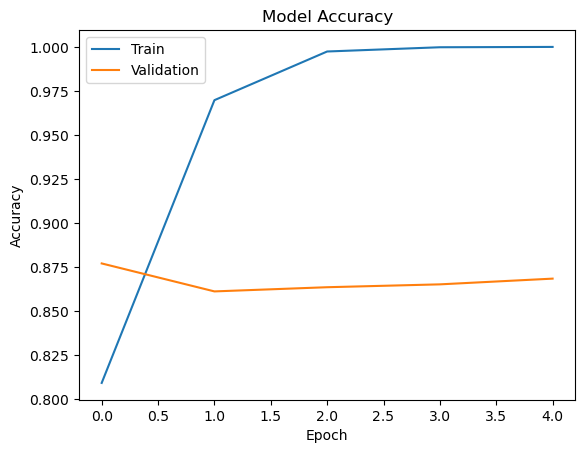

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

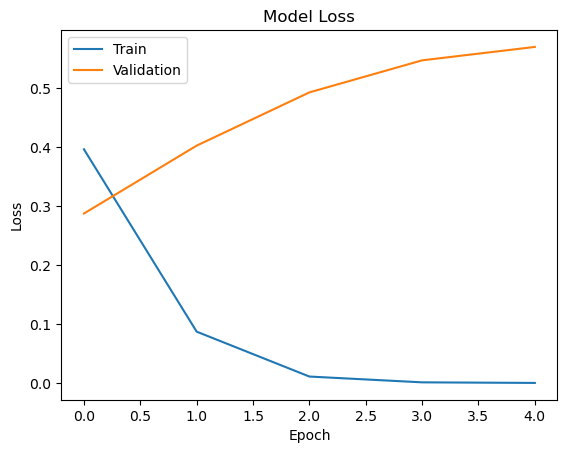

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [21]:
def classify_new_text(text):
    # Tokenize and convert the new text to a sequence of integers
    seq = tokenizer.texts_to_sequences([text])
    pad_seq = pad_sequences(seq, maxlen=maxlen)
    
    # Predict sentiment
    prediction = model.predict(pad_seq)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    # Convert numeric prediction back to sentiment label
    class_labels = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return class_labels[predicted_class]

In [27]:
user_input = input("Enter a text: ")
predicted_sentiment = classify_new_text(user_input)
print(f"Predicted Sentiment: {predicted_sentiment}")

Enter a text: hey, Its good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Sentiment: Positive
